# Part 2: Data Analytics

## Step 1: Crawl a real-world dataset

In [3]:
"""
Author: Rory Owen Bennett
Section: Crawl a real-world dataset
Description: This program fetches current weather data for a list of cities using the OpenWeather API 
and saves the data to a CSV file. The weather data includes temperature, humidity, pressure, 
and weather description.
"""

import requests
import csv
import time

# Define the API key and endpoint
api_key = '2a5b1f75694b749f05d2fddcb7dd29bd'
endpoint = 'http://api.openweathermap.org/data/2.5/weather'

# List of cities to fetch weather data for
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", 
          "San Antonio", "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville",
          "Fort Worth", "Columbus", "San Francisco", "Charlotte", "Indianapolis",
          "Seattle", "Denver", "Washington", "Boston", "El Paso", "Nashville",
          "Detroit", "Oklahoma City", "Portland", "Las Vegas", "Memphis",
          "Louisville", "Baltimore"]

# Define the columns for the CSV
columns = ['City', 'Temperature', 'Humidity', 'Pressure', 'Weather']

def fetch_weather_data(city, api_key, endpoint):
    """
    Fetch weather data for a given city using the OpenWeather API.

    Parameters:
    city (str): The name of the city.
    api_key (str): The API key for authentication.
    endpoint (str): The endpoint URL for the API.

    Returns:
    dict: The JSON response from the API containing weather data.
    """
    response = requests.get(endpoint, params={'q': city, 'appid': api_key, 'units': 'metric'})
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to get data for {city}: {response.json()['message']}")
        return None

def extract_relevant_data(data, city):
    """
    Extract relevant weather data from the API response.

    Parameters:
    data (dict): The JSON response from the API.
    city (str): The name of the city.

    Returns:
    list: A list containing the city name, temperature, humidity, pressure, and weather description.
    """
    if data:
        return [
            city,
            data['main']['temp'],
            data['main']['humidity'],
            data['main']['pressure'],
            data['weather'][0]['description']
        ]
    return None

# Open CSV file for writing
with open('weather_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(columns)  # Write the header

    # Fetch weather data for each city and write to CSV
    for city in cities:
        data = fetch_weather_data(city, api_key, endpoint)
        city_data = extract_relevant_data(data, city)
        if city_data:
            writer.writerow(city_data)  # Write data to CSV
        
        # To avoid hitting the API rate limit
        time.sleep(1)

print("Data extraction complete and saved to weather_data.csv.")

Data extraction complete and saved to weather_data.csv.


**Data Source and Collection**

I retrieved my dataset using the OpenWeather API. OpenWeather provides users with the current weather data for various locations around the world. My extraction process involved making an API request for the weather information of a group of cities in America and saving the results into a CSV file.

**Variables of Interest**

The dataset that I extracted included the following variables:

- City: The name of the city for which the weather data is collected.
- Temperature (°C): The current temperature in the city in degrees Celsius.
- Humidity (%): The current humidity level in the city, expressed as a percentage.
- Pressure (hPa): The current atmospheric pressure in the city, measured in hectopascals.
- Weather: A qualitative description of the current weather condition in the city (e.g., clear sky, light rain).
- Temperature_F (°F): The current temperature in the city converted to degrees Fahrenheit (added for enrichment).
- Weather_Category: A categorised version of the weather description, grouping similar weather conditions (e.g., Clear, Cloudy, Rainy, Snowy, Other).

**Data Scraping/Collection Process**
1. Firstly, I obtained an API key from OpenWeather by signing up on their website. API keys are used to authenticate requests for data.
2. I defined a list of cities, and for each city, made an API request to the OpenWeather "Current Weather Data" endpoint. The requests included the city name and the API key as parameters.
3. For each API response, the relevant data (temperature, humidity, pressure, weather description) was extracted and stored in a list.
4. I saved the collected data into a CSV file named weather_data.csv.
5. Finally, I created additional colums for temperature in Fahrenheit and categorised weather conditions, resulting in an enriched dataset which was saved as enriched_weather_data.csv.

## Step 2: Perform data preparation & cleaning

          City  Temperature  Humidity  Pressure        Weather
0     New York        21.49        66      1017      clear sky
1  Los Angeles        18.67        68      1015           haze
2      Chicago        27.59        61      1009  broken clouds
3      Houston        32.39        60      1008     few clouds
4      Phoenix        27.09        28      1010  moderate rain
City           0
Temperature    0
Humidity       0
Pressure       0
Weather        0
dtype: int64
       Temperature   Humidity     Pressure
count    30.000000  30.000000    30.000000
mean     26.518333  51.366667  1013.166667
std       5.781496  15.777512     5.166759
min      16.730000   8.000000  1003.000000
25%      20.567500  43.750000  1009.250000
50%      27.340000  52.500000  1014.000000
75%      31.067500  64.750000  1015.000000
max      35.420000  72.000000  1025.000000


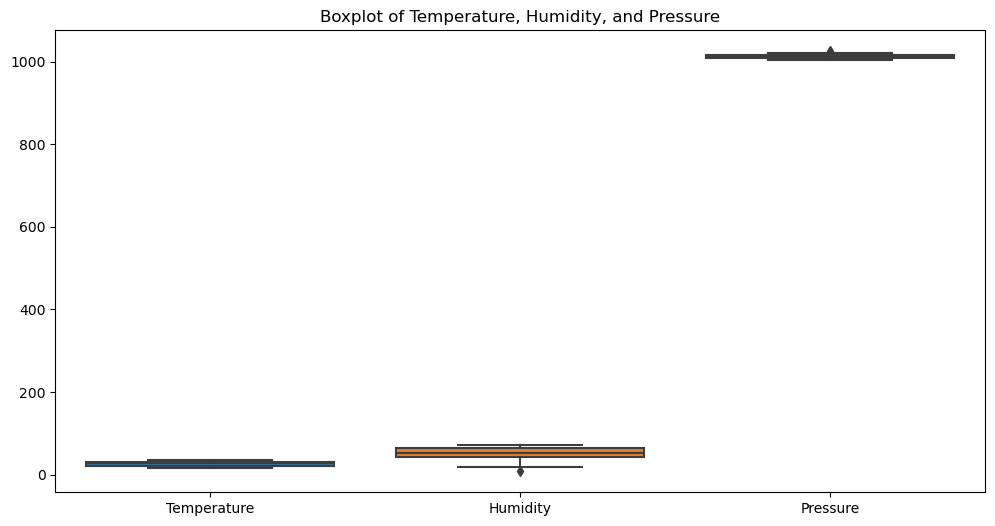

          City  Temperature  Humidity  Pressure        Weather  Temperature_F  \
0     New York        21.49        66      1017      clear sky         70.682   
1  Los Angeles        18.67        68      1015           haze         65.606   
2      Chicago        27.59        61      1009  broken clouds         81.662   
3      Houston        32.39        60      1008     few clouds         90.302   
4      Phoenix        27.09        28      1010  moderate rain         80.762   

  Weather_Category  
0            Clear  
1            Other  
2           Cloudy  
3           Cloudy  
4            Rainy  


In [4]:
"""
Author: Rory Owen Bennett
Section: Perform data preparation & cleaning
Description: This program loads weather data from a CSV file, handles missing data,
detects and removes outliers, converts temperature from Celsius to Fahrenheit,
categorises weather descriptions, and saves the enriched data to a new CSV file.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('weather_data.csv')
print(df.head())

# Handle missing data by dropping rows with any missing values
print(df.isnull().sum())
df = df.dropna()

# Display basic statistical summary for the dataset
print(df.describe())

# Visual inspection using boxplots for Temperature, Humidity, and Pressure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Temperature', 'Humidity', 'Pressure']])
plt.title('Boxplot of Temperature, Humidity, and Pressure')
plt.show()

# Handle outliers using the Z-score method
# Calculate Z-scores for Temperature, Humidity, and Pressure
z_scores = stats.zscore(df[['Temperature', 'Humidity', 'Pressure']])
abs_z_scores = abs(z_scores)
threshold = 3
df = df[(abs_z_scores < threshold).all(axis=1)]

# Convert Temperature from Celsius to Fahrenheit and create a new column
df['Temperature_F'] = df['Temperature'] * 9/5 + 32

# Function to categorise weather descriptions into broader categories
def categorise_weather(description):
    """
    Categorise weather description into broader categories.

    Parameters:
    description (str): Detailed weather description.

    Returns:
    str: Broader weather category (Clear, Cloudy, Rainy, Snowy, Other).
    """
    if 'clear' in description.lower():
        return 'Clear'
    elif 'cloud' in description.lower():
        return 'Cloudy'
    elif 'rain' in description.lower():
        return 'Rainy'
    elif 'snow' in description.lower():
        return 'Snowy'
    else:
        return 'Other'

# Apply the categorise_weather function to the Weather column
df['Weather_Category'] = df['Weather'].apply(categorise_weather)

# Display the first few rows of the enriched DataFrame
print(df.head())

# Save the enriched DataFrame to a new CSV file
df.to_csv('enriched_weather_data.csv', index=False)

**Data Preparation and Cleaning**

To prepare and clean the data, I took the following steps:

1. The dataset was loaded into a Pandas DataFrame from the CSV file.

2. Any missing data was identified and handled by dropping rows with any missing values.

3. Any outliers were identified and removed using the Z-score method. Data points with Z-scores greater than a threshold of 3 were considered outliers and removed.

**Feature Extraction and Enrichment**

I chose to enrich the dataset by extracting and creating some additional features:

1. A new column Temperature_F was added to the DataFrame, converting temperatures from Celsius to Fahrenheit.

2. The Weather column, which contained detailed descriptions, was categorised into broader weather categories (Clear, Cloudy, Rainy, Snowy, Other).

I took these steps in order to ensure that the data was clean, consistent, and enriched with additional features, allowing for a more comprehensive analysis.

**Summary of Insights**

1. The dataset showed a moderate climate with average temperatures around 26.52°C, ranging from 16.73°C to 35.42°C. The absence of any significant outliers suggests consistent temperature readings across the cities in question.

2. The average humidity level was relatively high at 51.37%, with a wide range from 8% to 72%. A few cities exhibited much lower humidity, as shown by the outliers in the box plot.

3. Atmospheric pressure readings were stable and close to the average sea-level pressure, with a mean of 1013.17 hPa. A small range of 22 hPa was observed alongside a lack of outliers, indicating a consistent atmospheric pressure across cities.

4. Clear, Cloudy, and Other weather categories provide a simplified view of the weather conditions present in these cities. Cloudy weather was the most common, followed by Clear and Other conditions.

This section of the analysis provides a comprehensive understanding of weather patterns across the different cities, highlighting temperature consistency, humidity variability, and stable atmospheric pressure. The additional features of the enriched dataset offered deeper insights into weather conditions.

## Step 3: Perform exploratory analysis

Temperature - Mean: 26.518333333333334, Sum: 795.5500000000001, Range: 18.69
Humidity - Mean: 51.36666666666667, Sum: 1541, Range: 64
Pressure - Mean: 1013.1666666666666, Sum: 30395, Range: 22


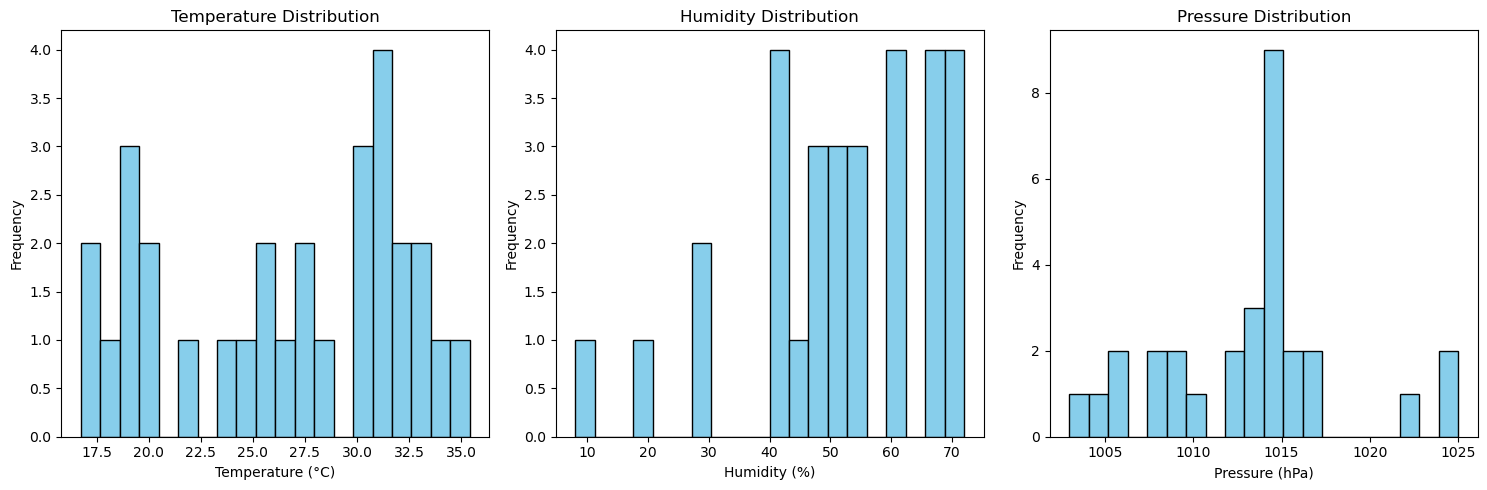

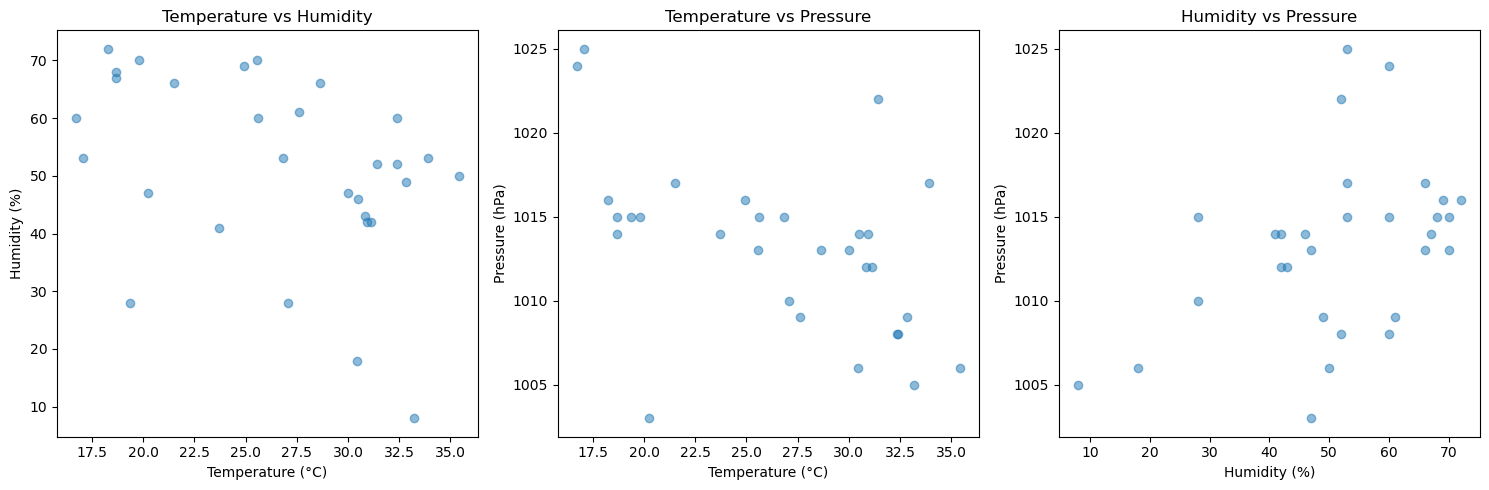

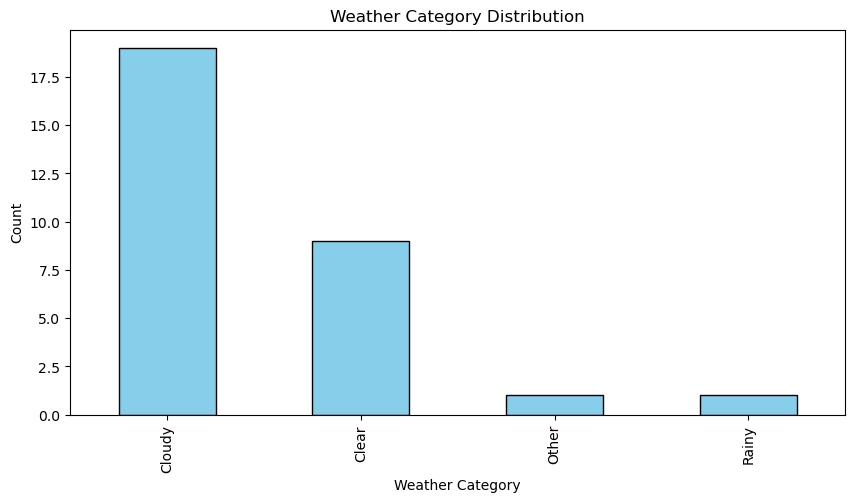

In [7]:
"""
Author: Rory Owen Bennett
Section: Perform exploratory analysis
Description: This program performs exploratory data analysis (EDA) on weather data.
It computes basic statistics, visualises distributions using histograms and scatter plots,
and analyses the distribution of weather categories using bar charts.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enriched_weather_data.csv')

# Compute basic statistics for Temperature, Humidity, and Pressure
mean_temp = df['Temperature'].mean()
sum_temp = df['Temperature'].sum()
range_temp = df['Temperature'].max() - df['Temperature'].min()

mean_humidity = df['Humidity'].mean()
sum_humidity = df['Humidity'].sum()
range_humidity = df['Humidity'].max() - df['Humidity'].min()

mean_pressure = df['Pressure'].mean()
sum_pressure = df['Pressure'].sum()
range_pressure = df['Pressure'].max() - df['Pressure'].min()

print(f"Temperature - Mean: {mean_temp}, Sum: {sum_temp}, Range: {range_temp}")
print(f"Humidity - Mean: {mean_humidity}, Sum: {sum_humidity}, Range: {range_humidity}")
print(f"Pressure - Mean: {mean_pressure}, Sum: {sum_pressure}, Range: {range_pressure}")

# Plot histograms for Temperature, Humidity, and Pressure
plt.figure(figsize=(15, 5))

# Histogram for Temperature
plt.subplot(1, 3, 1)
plt.hist(df['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for Humidity
plt.subplot(1, 3, 2)
plt.hist(df['Humidity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Histogram for Pressure
plt.subplot(1, 3, 3)
plt.hist(df['Pressure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot scatter plots to explore relationships between Temperature, Humidity, and Pressure
plt.figure(figsize=(15, 5))

# Scatter plot for Temperature vs Humidity
plt.subplot(1, 3, 1)
plt.scatter(df['Temperature'], df['Humidity'], alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

# Scatter plot for Temperature vs Pressure
plt.subplot(1, 3, 2)
plt.scatter(df['Temperature'], df['Pressure'], alpha=0.5)
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (hPa)')

# Scatter plot for Humidity vs Pressure
plt.subplot(1, 3, 3)
plt.scatter(df['Humidity'], df['Pressure'], alpha=0.5)
plt.title('Humidity vs Pressure')
plt.xlabel('Humidity (%)')
plt.ylabel('Pressure (hPa)')

plt.tight_layout()
plt.show()

# Plot bar chart for Weather Category distribution
weather_counts = df['Weather_Category'].value_counts()

plt.figure(figsize=(10, 5))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Weather Category Distribution')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.show()

**Exploratory Data Analysis (EDA)**

My EDA section of the analysis involved examining the dataset in order to summarise its main characteristics and uncover any patterns, anomalies, and relationships which were present within the data. Here are the steps that I took and the observations that I made:

1. Firstly, I calculated the mean, sum, and range for temperature, humidity, and pressure.

*Observations:*

- The average temperature (26.52°C) indicated a moderate climate for most cities.
- There was a significant range (18.69°C) which reflected a wide variety of temperatures, showing that the dataset includes cities from plenty of different climate zones.
- The average humidity (51.37%) was relatively high, suggesting that many cities in the dataset experience humid conditions.
- A large range of 64% was observed in humidity levels indicating substantial variability, showing that some cities are much more humid than others in this dataset.
- The average pressure (1013.17 hPa) was close to the standard atmospheric pressure, indicating stable pressure conditions across the dataset.
- A smaller range (22 hPa) in pressure values shows less variability, suggesting that atmospheric pressure is more uniform across these different cities.

2. I plotted histograms to explore the distribution of temperature, humidity, and pressure.

*Observations:*

- The temperature histogram shows a multimodal distribution with significant variability across different cities, indicating diverse temperature conditions.
- The humidity histogram's skewed distribution towards higher values indicates that most cities have high humidity levels, with 60% and 70% being among the most common.
- The pressure histogram indicates that atmospheric pressure tends to cluster around 1012-1017 hPa, with relatively less variability compared to temperature and humidity.

3. I plotted scatter plots to explore the relationships between temperature, humidity, and pressure.

*Observations:*

- The scatter plot of temperature vs. humidity indicates a weak negative correlation.
- The Temperature vs. pressure scatter plot shows a stronger negative correlation.
- The Humidity vs. pressure scatter plot suggests some positive relationship but with considerable variability.

4. Finally, I plotted a bar chart to visualise the distribution of weather categories.

*Observations:*

- Cloudy weather was the most frequent category, followed by clear, other and rainy conditions.

## Step 4: Ask questions about your data

The city with the highest average temperature is San Antonio with an average temperature of 35.42°C.


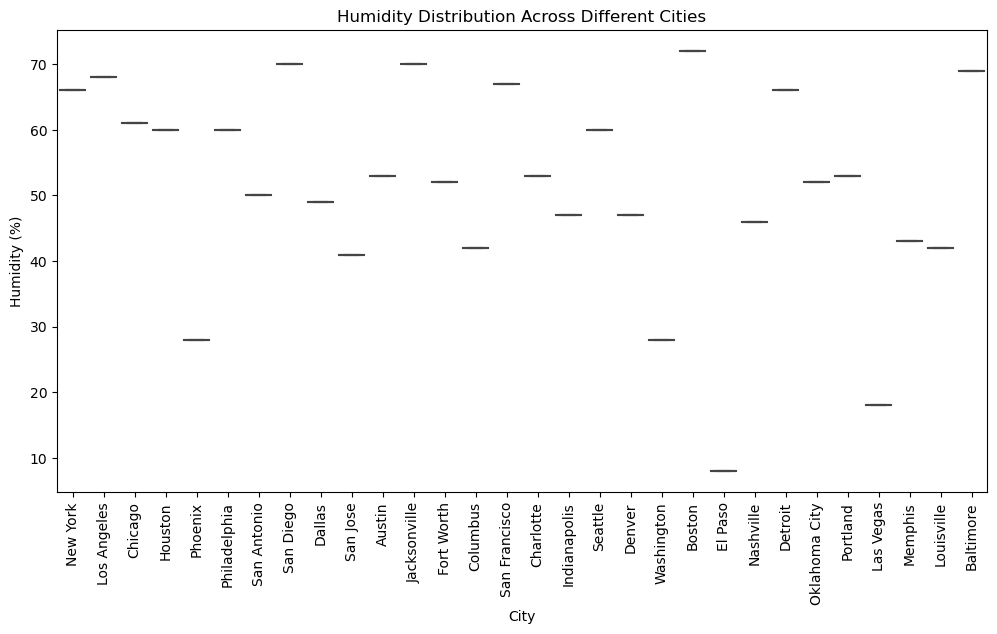

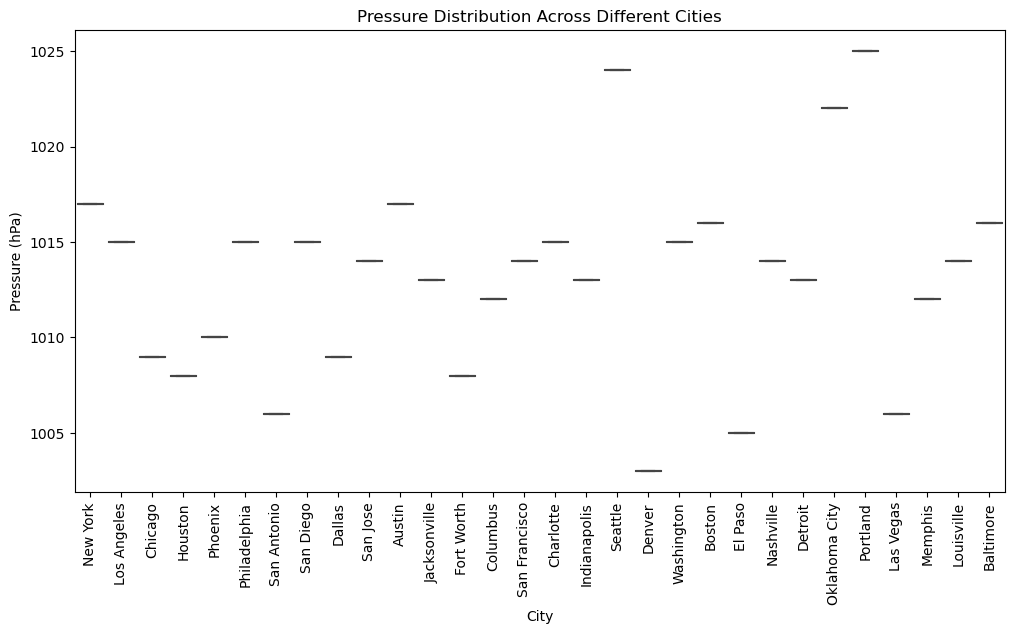

  Weather_Category  Temperature   Humidity
0            Clear    27.520000  55.444444
1           Cloudy    26.426842  49.789474
2            Other    18.670000  68.000000
3            Rainy    27.090000  28.000000
T-test for Temperature: t-statistic = 0.46, p-value = 0.6496
T-test for Humidity: t-statistic = 0.91, p-value = 0.3738
  Weather_Category  Temperature  Humidity
0            Rainy        27.09      28.0
The correlation between temperature and humidity is -0.40.
The correlation between temperature and pressure is -0.49.
Linear Regression Model: Mean Squared Error = 12.77, R-squared = 0.41


In [8]:
"""
Author: Rory Owen Bennett
Section: Ask questions about your data
Description: This program performs exploratory data analysis (EDA) on weather data,
answers complex questions regarding weather variations across cities, and examines
the relationship between different weather variables using statistical methods and
visualisations.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('enriched_weather_data.csv')

# Question 1: How does weather vary between different cities?
# Sub-question 1.1: Which city experiences the highest average temperature?
avg_temp_by_city = df.groupby('City')['Temperature'].mean().reset_index()
highest_avg_temp_city = avg_temp_by_city.loc[avg_temp_by_city['Temperature'].idxmax()]
print(f"The city with the highest average temperature is {highest_avg_temp_city['City']} with an average temperature of {highest_avg_temp_city['Temperature']:.2f}°C.")

# Sub-question 1.2: What is the distribution of humidity across different cities?
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Humidity', data=df)
plt.xticks(rotation=90)
plt.title('Humidity Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Humidity (%)')
plt.show()

# Sub-question 1.3: How does atmospheric pressure vary between cities?
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Pressure', data=df)
plt.xticks(rotation=90)
plt.title('Pressure Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Pressure (hPa)')
plt.show()

# Question 2: How do different weather conditions affect temperature and humidity?
# Sub-question 2.1: What is the average temperature and humidity for different weather categories?
avg_temp_humidity_by_weather = df.groupby('Weather_Category')[['Temperature', 'Humidity']].mean().reset_index()
print(avg_temp_humidity_by_weather)

# Sub-question 2.2: Is there a significant difference in temperature and humidity between 'Clear' and 'Cloudy' weather conditions?
clear_weather = df[df['Weather_Category'] == 'Clear']
cloudy_weather = df[df['Weather_Category'] == 'Cloudy']
t_stat_temp, p_val_temp = ttest_ind(clear_weather['Temperature'], cloudy_weather['Temperature'])
t_stat_humidity, p_val_humidity = ttest_ind(clear_weather['Humidity'], cloudy_weather['Humidity'])
print(f"T-test for Temperature: t-statistic = {t_stat_temp:.2f}, p-value = {p_val_temp:.4f}")
print(f"T-test for Humidity: t-statistic = {t_stat_humidity:.2f}, p-value = {p_val_humidity:.4f}")

# Sub-question 2.3: How do extreme weather conditions (e.g., rainy, snowy) affect temperature and humidity?
extreme_weather = df[df['Weather_Category'].isin(['Rainy', 'Snowy'])]
avg_temp_humidity_extreme = extreme_weather.groupby('Weather_Category')[['Temperature', 'Humidity']].mean().reset_index()
print(avg_temp_humidity_extreme)

# Question 3: Is there a relationship between temperature, humidity, and pressure?
# Sub-question 3.1: What is the correlation between temperature and humidity?
correlation_temp_humidity = df[['Temperature', 'Humidity']].corr().iloc[0, 1]
print(f"The correlation between temperature and humidity is {correlation_temp_humidity:.2f}.")

# Sub-question 3.2: What is the correlation between temperature and pressure?
correlation_temp_pressure = df[['Temperature', 'Pressure']].corr().iloc[0, 1]
print(f"The correlation between temperature and pressure is {correlation_temp_pressure:.2f}.")

# Sub-question 3.3: Can we predict pressure based on temperature and humidity using a linear regression model?
# Prepare the feature matrix (X) and target vector (y)
X = df[['Temperature', 'Humidity']]
y = df['Pressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model: Mean Squared Error = {mse:.2f}, R-squared = {r2:.2f}")


**Detailed Analysis and Insights**

In this section I have outlined the entire analytical process from the data preparation and EDA up to the insights derived from questioning the data in the code immediately above. Each step includes adescription of my intent with an action or interpretation of a plot.

**Sourcing the Data**

*Objective:* Obtain current weather data for multiple cities to analyse and extract meaningful insights.

*Data Source:* OpenWeather API, which provides current weather data for various locations around the world.

- Step 1: Firstly, I signed up on the OpenWeather website to get an API key for authenticating requests.

- Step 2: I defined a list of cities and made API requests to the OpenWeather "Current Weather Data" endpoint to fetch weather data for each city.

- Step 3: Finally, I extracted the relevant data (temperature, humidity, pressure, weather description) from the API responses and stored it in a CSV file.

**Data Preparation and Cleaning**

*Objective:* Clean the dataset to ensure it was ready for analysis by handling missing values and outliers, and enriching the data with additional features.

- Step 1: I loaded the dataset from a CSV file into a Pandas DataFrame for analysis.

- Step 2: I identified any missing data and handled them by dropping rows with any missing values to ensure data integrity.

- Step 3: Any outliers were identified using the Z-score method and removed to maintain data consistency.

**Feature Extraction and Enrichment**

- Step 4: I added a new column, Temperature_F, to the DataFrame, converting temperatures from Celsius to Fahrenheit.

- Step 5: The Weather column was categorised into broader weather categories (Clear, Cloudy, Rainy, Snowy, Other).

**Exploratory Data Analysis (EDA)**

*Objective:* Summarise the main characteristics of the dataset, uncover patterns, and explore relationships between variables.

1. Firstly, I calculated the mean, sum, and range for temperature, humidity, and pressure.

*Observations:*

- The average temperature (26.52°C) indicated a moderate climate for most cities.
- There was a significant range (18.69°C) which reflected a wide variety of temperatures, showing that the dataset includes cities from plenty of different climate zones.
- The average humidity (51.37%) was relatively high, suggesting that many cities in the dataset experience humid conditions.
- A large range of 64% was observed in humidity levels indicating substantial variability, showing that some cities are much more humid than others in this dataset.
- The average pressure (1013.17 hPa) was close to the standard atmospheric pressure, indicating stable pressure conditions across the dataset.
- A smaller range (22 hPa) in pressure values shows less variability, suggesting that atmospheric pressure is more uniform across these different cities.

2. I plotted histograms to explore the distribution of temperature, humidity, and pressure.

*Observations:*

- The temperature histogram shows a multimodal distribution with significant variability across different cities, indicating diverse temperature conditions.
- The humidity histogram's skewed distribution towards higher values indicates that most cities have high humidity levels, with 60% and 70% being among the most common.
- The pressure histogram indicates that atmospheric pressure tends to cluster around 1012-1017 hPa, with relatively less variability compared to temperature and humidity.

3. I plotted scatter plots to explore the relationships between temperature, humidity, and pressure.

*Observations:*

- The scatter plot of temperature vs. humidity indicates a weak negative correlation.
- The Temperature vs. pressure scatter plot shows a stronger negative correlation.
- The Humidity vs. pressure scatter plot suggests some positive relationship but with considerable variability.

4. Finally, I plotted a bar chart to visualise the distribution of weather categories.

*Observations:*

- Cloudy weather was the most frequent category, followed by clear, other and rainy conditions.

**Questioning the data**

*Objective:* Formulate complex questions to extract deeper insights and answer them using computations and visualisations.

*Summary of Insights*

- The city with the highest average temperature (San Antonio) was identified, and the temperature distribution showed a roughly normal pattern.
- The humidity distribution was uniform with higher levels (50-70), and pressure was concentrated around a specific range (roughly 1010 to 1015).
- Cloudy weather was the most frequent, followed by clear, other, and rainy conditions. 
- Temperature and humidity showed a moderate negative correlation, while temperature and pressure had a stronger negative relationship.
- A linear regression model indicated a good fit for predicting pressure based on temperature and humidity, with a reasonably high R-squared value.

By following these steps, I ensured a thorough analysis of the weather data, revealing key patterns and relationships that could be valuable for further research and decision-making.

## Step 5: Summarise and write a conclusion

**Summary of Findings**

From the analysis of the weather dataset I derived several key insights:

1. The dataset showed a moderate climate with an average temperature of 26.52°C, ranging from 16.73°C to 35.42°C. The temperature distribution was relatively consistent across cities, with no significant outliers.

2. The average humidity level was relatively high at 51.37%, with a wide range from 8% to 72%. A few cities exhibited significantly lower humidity levels, which were indicated by outliers in the box plot. The majority of cities had high humidity levels, which was reflected in the higher quartiles.

3. The average atmospheric pressure was 1013.17 hPa, which is close to the standard sea-level pressure. The pressure distribution was stable, with values ranging from 1003 hPa to 1025 hPa and no significant outliers.

4. Cloudy weather was the most common category, followed by Clear, Other and rainy conditions. The categorisation of weather descriptions helped to simplify the analysis and provide a broader understanding of weather patterns.

**Relationships and Correlations**

1. There was a moderate negative correlation (-0.40) between temperature and humidity, suggesting that higher temperatures are generally associated with lower humidity levels.

2. There was a moderate negative correlation (-0.49) between temperature and pressure, indicating that higher temperatures are associated with lower atmospheric pressure.

3. The scatter plots suggest some relationship between humidity and pressure, but it is not as strong or clear as the other correlations.

**Statistical Analysis and Predictive Modeling**

1. The t-tests comparing clear and cloudy weather conditions for temperature and humidity suggested that there were no significant differences at the 5% significance level, although there was a trend towards significance for humidity.

2. A linear regression model was used to predict pressure based on temperature and humidity. The model showed a mean squared error (MSE) of 12.77 and an R-squared value of 0.41, indicating that 41% of the variance in pressure can be explained by temperature and humidity. While this shows some predictive power, it also suggests that other factors play a significant role in determining pressure.

**Future Work and Ideas**

To expand upon this analysis and gain deeper insights, I have proposed several avenues which future work could explore:

1. Collect and analyse weather data over time to understand seasonal trends and long-term changes in weather patterns. This could involve daily, monthly, or yearly data collection.

2. Using additional weather variables such as wind speed, visibility, and precipitation levels could provide a more comprehensive understanding of weather conditions.

3. Comparing current weather data with historical weather data would reveal trends and changes over time, which is crucial for understanding climate change and its impact.

4. Including geographical data (latitude, longitude, altitude) could help analyse the influence of geographical factors on weather patterns. Mapping weather data geographically can also identify regional trends.

5. Develop more sophisticated machine learning models, such as random forests or neural networks, to improve predictive power and accuracy for weather prediction.

6. Study the impact of urbanisation on weather patterns by comparing weather data from urban and rural areas. This could help understand phenomena like the urban heat island effect.

7. Integrate weather data with other relevant datasets, such as air quality, health records, and agricultural data, to study the broader impact of weather on various aspects of life and the environment.

8. Analyse the frequency, intensity, and impact of extreme weather events (e.g., hurricanes, heatwaves, blizzards) to understand their trends and devise mitigation strategies.

**Conclusion**

My analysis provided valuable insights into the weather patterns of various cities, revealing key relationships and distributions of temperature, humidity, and pressure. By leveraging additional data sources and advanced analytical techniques, future work could further enhance our understanding of weather dynamics and their broader implications.